In [143]:
import numpy as np
from numpy.typing import ArrayLike, NDArray
from typing import List, Optional, Tuple
import pandas as pd
import sys
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import importlib
import test_clustering_rand_pts
importlib.reload(test_clustering_rand_pts)

from test_clustering_rand_pts import *

#sys.path.append('../')



In [151]:
Nsample = 100
trajectory_length= 100
d = 3
n_clusterss = [2,3,4,5,10,15,20,30,50,100,200,300,400,500]

pts,ctr = generate_clustered_points(Nsample=Nsample,trajectory_length=trajectory_length,d=d,Radius=2.)
h = compute_entropy(pts,n_clusterss=n_clusterss,Nsample=Nsample,trajectory_length=trajectory_length,d=d)


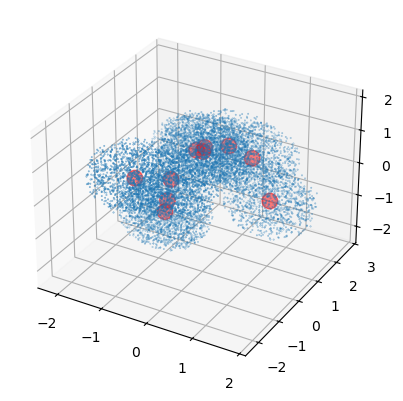

In [152]:

fig,ax = plt.subplots(subplot_kw={'projection':'3d'})
ax.scatter(ctr[:,0],ctr[:,1],ctr[:,2],color='red',s = 1.27*100,alpha=0.5)
ax.scatter(pts.reshape(-1,d)[:,0],pts.reshape(-1,d)[:,1],pts.reshape(-1,d)[:,2],s=0.1)

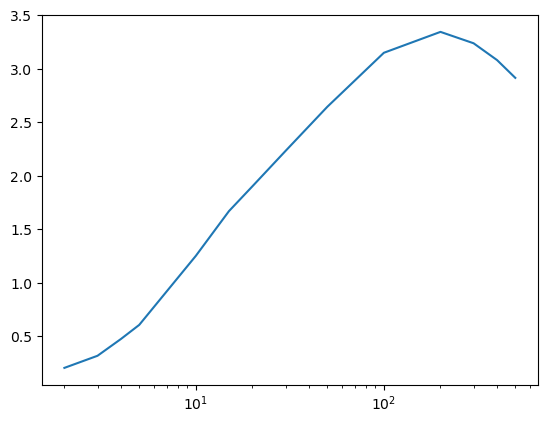

In [153]:
plt.plot(n_clusterss,h)
plt.xscale('log')

Now try with different numbers of clusters

In [154]:
Nsample = 1000
trajectory_length= 100
d = 3
n_real_clusters = [2,3,5,10,15,20,25,50,100]
n_clustering_kmeans = [2,3,4,5,10,15,20,30,50,100,200,300,400,500]
H = list()
for i in n_real_clusters:
    #print(i)
    pts,ctr = generate_clustered_points(Nsample=Nsample,trajectory_length=trajectory_length,d=d,N_centers=i)
    h = compute_entropy(pts,n_clusterss=n_clustering_kmeans,Nsample=Nsample,trajectory_length=trajectory_length,d=d)
    H.append(h)

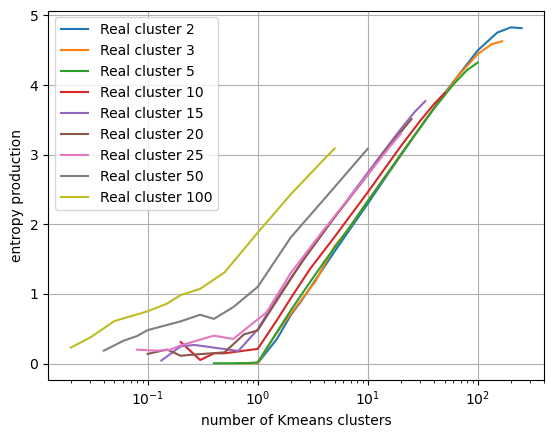

In [156]:
for n,h in enumerate(H):
    plt.plot(np.array(n_clustering_kmeans)/n_real_clusters[n],h,label="Real cluster "+str(n_real_clusters[n]))
#plt.scatter(n_clustering_kmeans,H[6])
#print(H[6])
#print(n_clustering_kmeans)
plt.legend()
plt.xscale('log')
plt.xlabel('number of Kmeans clusters')
plt.ylabel('entropy production')
plt.grid()
#plt.ylim(0,6)

In [160]:
Nsample = 1000
trajectory_length= 100
d = 3
n_real_clusters = 50
n_clustering_kmeans = [2,3,4,5,10,15,20,30,50,100,200,300,400,500]
dists = [0.1,0.5,0.75,1,2,3,4,5,10]
H = list()
for distance in dists:
    print(distance)
    pts,ctr = generate_clustered_points(Nsample=Nsample,trajectory_length=trajectory_length,d=d,N_centers=n_real_clusters,Radius=distance)
    h = compute_entropy(pts,n_clusterss=n_clustering_kmeans,Nsample=Nsample,trajectory_length=trajectory_length,d=d)
    H.append(h)

0.1
0.5
0.75
1
2
3
4
5
10


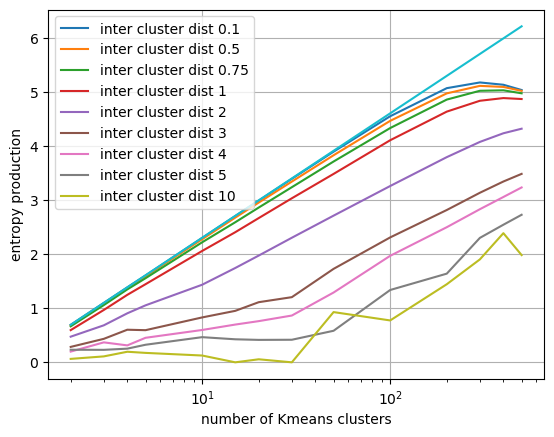

In [164]:
for n,h in enumerate(H):
    plt.plot(n_clustering_kmeans,h,label="inter cluster dist "+str(dists[n]))
plt.plot(n_clustering_kmeans, np.log(n_clustering_kmeans))
#plt.scatter(n_clustering_kmeans,H[6])
#print(H[6])
#print(n_clustering_kmeans)
plt.legend()
plt.xscale('log')
plt.xlabel('number of Kmeans clusters')
plt.ylabel('entropy production')
plt.grid()
#plt.ylim(0,6)

In [166]:
Nsample = 1000
trajectory_length= 100
n_real_clusters = 50
n_clustering_kmeans = [2,3,4,5,10,15,20,30,50,100,200,300,400,500]
dims = [1,2,3,4,5,7,10,20]
H = list()
for d in dims:
    pts,ctr = generate_clustered_points(Nsample=Nsample,trajectory_length=trajectory_length,d=d,N_centers=n_real_clusters,Radius=4)
    h = compute_entropy(pts,n_clusterss=n_clustering_kmeans,Nsample=Nsample,trajectory_length=trajectory_length,d=d)
    H.append(h)

10
10
10
10
10
10
10
10


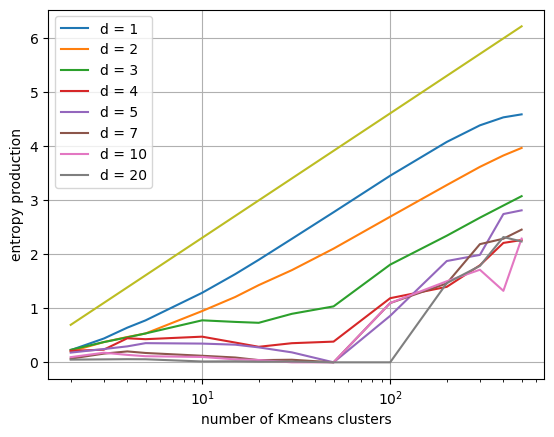

In [168]:
for n,h in enumerate(H):
    plt.plot(n_clustering_kmeans,h,label="d = "+str(dims[n]))
plt.plot(n_clustering_kmeans, np.log(n_clustering_kmeans))
#plt.scatter(n_clustering_kmeans,H[6])
#print(H[6])
#print(n_clustering_kmeans)
plt.legend()
plt.xscale('log')
plt.xlabel('number of Kmeans clusters')
plt.ylabel('entropy production')
plt.grid()
#plt.ylim(0,6)